<a href="https://colab.research.google.com/github/oferbaharav/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Ofer_Baharav_Copy_of_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [34]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
def find_mean(sales):
  return sum(sales)/len(sales)
def find_variance(sales):
  mean = find_mean(sales)
  return (sum([(x-mean)**2 for x in sales]))/len(sales)-1
def find_sd(sales):
  return find_variance(sales)**.5
sales_mean = find_mean(sales)
sales_variance = find_variance(sales)
sales_sd = find_sd(sales)
print("Mean: ", sales_mean)
print("Variance: ", sales_variance)
print("Standard Deviation: ", sales_sd)

Mean:  3052.714285714286
Variance:  183760.06122448976
Standard Deviation:  428.6724404769798


In [35]:
import numpy as np
mean = np.mean(sales) 
variance= np.var(sales, ddof=1)
std = np.std(sales,ddof=1) 

print(mean)
print(variance)
print(std)

3052.714285714286
214387.90476190473
463.0204150595357


https://stackoverflow.com/questions/46639182/calculating-mean-std-dev-and-variance-and-creating-a-new-data-frame-from-these

In [36]:
import pandas as pd
stats=pd.DataFrame(sales)
stats["mean"]=sales.mean()
stats["Std.Dev"]=sales.std()
stats["Var"]=sales.var()

AttributeError: ignored

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [37]:
customers = [127, 80, 105, 92, 120, 115, 93]
cov_sales_cust = np.cov(sales, customers)
print(cov_sales_cust)
#question: how do you interpret the numbers below?

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


In [38]:
df = pd.DataFrame(sales, customers)
df.cov()
#question: why is there only one result to this format for doing cov? (vs above there's 4)

,0
0,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [39]:
customers_std = np.std(customers, ddof=1)
print(customers_std)

17.057326313123664


In [40]:
#what did I do wrong here?
std_cov = np.cov(std, customers_std)
df_corr = pd.DataFrame(std_cov)
df_corr.corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,0,1
0,NaN,NaN
1,NaN,NaN


In [0]:
#another attempt with numpy
print(np.corrcoef(sales, customers))

In [0]:
print(np.corrcoef(sales, customers))

In [41]:
#remembering to indicate which of the numbers, by chosing 2nd row and 1st column
df1 = np.cov(sales, customers)[1][0]/(std * customers_std)
print(df1)

0.9628339778148909


In [0]:
#my takeaway here is that between doing the last np.cov()/std * customers_std vs simply np.corrcoef

In [43]:
dictionary_tk = {
  "name": "Leandro",
  "nickname": "Tk",
  "nationality": "Brazilian",
  "age": 24
}

for i, e  in dictionary_tk.items():
    print("My %s is %s" %(i, e))
    
# My name is Leandro
# My nickname is Tk
# My nationality is Brazilian
# My age is 24

My name is Leandro
My nickname is Tk
My nationality is Brazilian
My age is 24


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [47]:
df_titanic =pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df_titanic.head(2)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [54]:
#variance-covariance matrix
#How do you interpret this?
df_titanic_cov = df_titanic.cov()
df_titanic_cov

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [49]:
df_titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [65]:
#question around why this is throwing an error. Also I couldn't find a correlation
#matrix in the classnotes
import pandas as pd
import numpy as np
print(corrcoef(np.array(df_titanic_cov))

SyntaxError: ignored

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

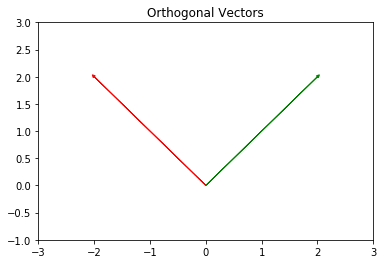

In [126]:
#example given in class notes
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

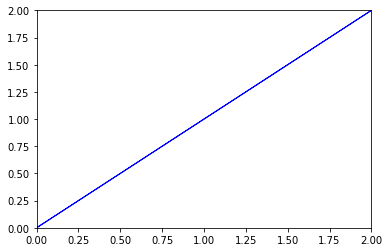

0

In [66]:
import matplotlib.pyplot as plt


def plot_two_vectors(vec1, vec2):
  xminmax = (0,vec2[0]) if vec2[0] > vec1[0] else (0, vec1[0])
  yminmax = (0,vec2[1]) if vec2[1] > vec1[1] else (0, vec1[1])
  plt.arrow(0, 0, vec1[0], vec1[1], head_width=0.1, head_length=0.1, color='red')
  plt.arrow(0, 0, vec2[0], vec2[1], head_width=0.1, head_length=0.1, color='blue')
  plt.xlim(xminmax[0],xminmax[1])          
  plt.ylim(yminmax[0],yminmax[1])
  plt.show()

avector = [-2, 2]
bvector = [2, 2]
plot_two_vectors(avector, bvector)
np.dot(avector, bvector)
# A synonym for orthogonal is perpendicular

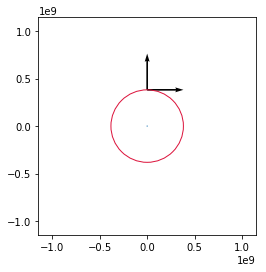

In [68]:
import matplotlib.pyplot as plt

R_min=356.5e6 #Perigee
R_max=406.7e6 #Apogee
R_avg = 0.5*(R_min + R_max)
r = 6.3781e6 #radius of Earth

ax = plt.gca()
ax.set_aspect("equal")
i = 0

# create arrows on moon orbit, both one orbit radius in length to both directions
ax.quiver([0,0], [R_avg,R_avg], [1,0], [0, 1], angles='xy',         
          scale_units='xy', scale=1./R_avg)

# create earth and moon orbit
earth = plt.Circle((0,0),r)
orbit = plt.Circle((0,0),R_avg, fill=False, color="crimson")
ax.add_patch(earth)
ax.add_patch(orbit)
ax.autoscale_view()
ax.margins(1)

plt.show()

(-10, 10)

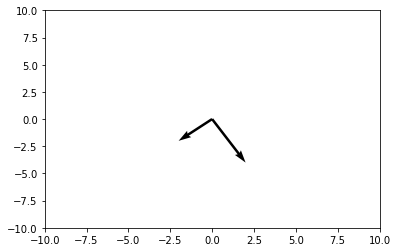

In [70]:
    # Importing modules
    import numpy as np
    import matplotlib.pyplot as plt


         
    #perpendicular acceleration vector

    plt.quiver([0,0 ], [0,0], [2,-2], [-4, -2], angles='xy',         
    scale_units='xy', scale=1)
    plt.xlim(-10,10)
    plt.ylim(-10,10)

   

In [0]:
#synonym of orthogonal is parallel

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [71]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
print(np.dot(a,b))
#since their dot product isn't zero, they're not orthogonal

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [72]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(np.dot(c.T,c))

# all three return the norm of the array

665.0
665
665


In [75]:
#test finding the norm from class example
b=np.array([1,2,2])
print(np.linalg.norm(b))

3.0


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
|| r|| = \sqrt{7^2 + 12^2}
\qquad
||r||=\sqrt{2^2+11^2+(-8)^2}
\end{align}

\begin{align}
|| r|| = \sqrt{49 + 144}
\qquad
||r||=\sqrt{4+121+64}
\end{align}

\begin{align}
|| r|| = \sqrt{193}
\qquad
||r||=\sqrt{189}
\end{align}

\begin{align}
u_{r} = (\frac{7\sqrt{193}}{193}, \frac{12\sqrt{193}}{193})
\qquad
u_{r}=(\frac{2\sqrt{189}}{189}, \frac{11\sqrt{189}}{189},-\frac{8\sqrt{189}}{189})
\end{align}

\begin{align}
v=7i+12j
\qquad
v=2i+11j-8k
\end{align}


***Your*** text here

In [0]:
#I need help explaining this... not clear 

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [107]:
f = np.array([4,12,11,9,2])
f_unit_vec = f/np.linalg.norm(f)
print(f_unit_vec)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import colors as mcolors

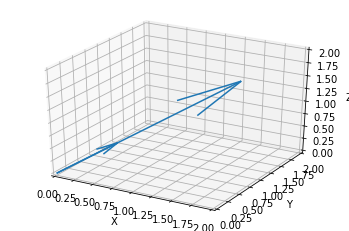

In [109]:
vector3 = np.array([[0, 0, 0, .5, .5, .5], [0, 0, 0, 1.5, 1.5, 1.5]])

X, Y, Z, U, V, W = zip(*vector3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

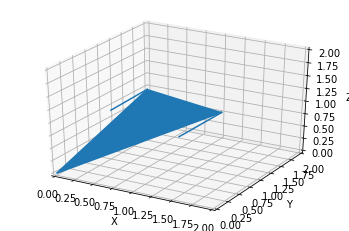

In [110]:
vector3 = np.array([[0, 0, 0, .75, .75, 1.5],[0, 0, 0, 1, 2, .5]])

X, Y, Z, U, V, W = zip(*vector3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
x = [0, .75 ,1]
y = [0, .75, 2]
z = [0, 1.5, .5]
verts = [list(zip(x,y,z))]
ax.add_collection3d(Poly3DCollection(verts))
ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

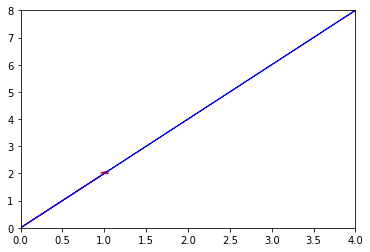

In [113]:
g = np.array([1,2])
h = np.array([4,8])
plot_two_vectors(g, h)
# the span is from (0,0) to (4,8)

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

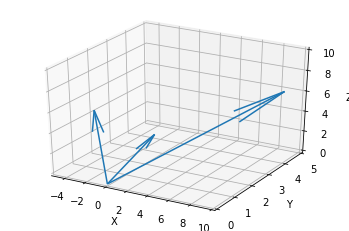

In [114]:
vector_l_m_n = np.array([[0, 0, 0, 1, 2, 3], [0, 0, 0, -1, 0, 7], [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vector_l_m_n)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-5,10])
ax.set_ylim([0,5])
ax.set_zlim([0,10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [0]:
#not sure what the span is for this plot {l,m,n}? If I had to take a guess, it would be R3 since
#there's no linearly dependent vectors

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



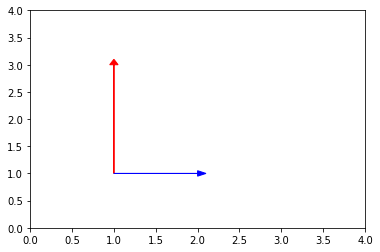

In [129]:
plt.arrow(1, 1, 0, 2, head_width=0.1, head_length=0.1, color='red')
plt.arrow(1, 1, 1, 0, head_width=0.1, head_length=0.1, color='blue')
plt.xlim(0,4)          
plt.ylim(0,4)
plt.show()

## 6.2 What does it mean to form a basis?

In [0]:
#I'm not sure. What does it mean to form a basis? According to Khan academy, 
#S forms the basis for the span of vectors. Does this make any sense? Nope. 
#I'll need some help understanding this

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [138]:
#why did this format not work, and only the one below did?
p = matrix([[1,2,3],
           [-1,0,7],
           [4,8,2]])
print(np.linalg.matrix_rank(p))

NameError: ignored

In [136]:
p = np.matrix('1 2 3;-1 0 7;4 8 2')
print(np.linalg.matrix_rank(p))

3


## 7.2 What does the rank of a matrix tell us?

In [0]:
#I guess for this matrix the rank says it spans the 3 dimensions?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


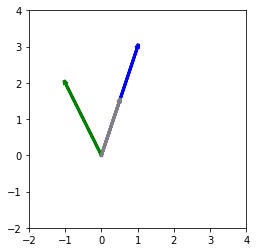

In [142]:
plt.xlim(-2, 4)
plt.ylim(-2, 4)
v = np.array([1, 3])
w = np.array([-1, 2])
proj = np.dot(1/np.linalg.norm(w), v)

proj = np.dot(v,w)/np.dot(v,v)*v

axes = plt.gca()
plt.axes().set_aspect('equal')

x_vals = np.array(axes.get_xlim())
y_vals = 1/3*x_vals

# plt.plot(x_vals, y_vals, '--', color='r', linewidth=1)

plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, color='blue')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, color='green')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, color='gray')
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

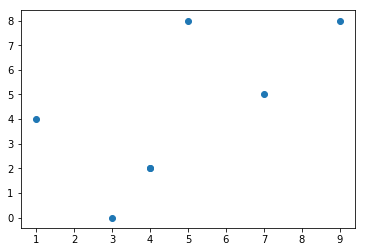

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

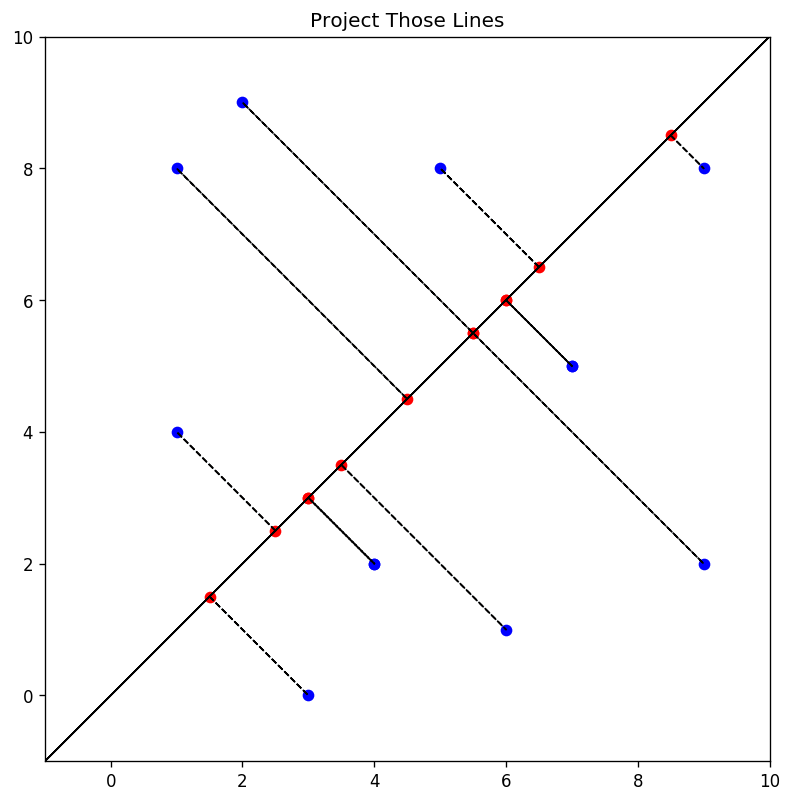

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

def lin_proj(point, line):
  return np.multiply(np.dot((point[0], point[1]), line)/np.dot(line,line),line)

def plot_all_projections(data, line):
  for ptr in range(0,len(data)):
    df_val = df.loc[ptr].values
    vect = lin_proj(df_val, line)
    plt.scatter(vect[0], vect[1], color='red')
    what = vect - (df_val[0], df_val[1])
#     plt.plot([df_val[0], what[0]], [df_val[1], what[1]], '--', color='r', linewidth=1)
    plt.arrow(df_val[0],df_val[1], what[0], what[1], linestyle='--')

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5, 7, 9, 6, 2, 1]
y_values = [4, 2, 5, 0, 8, 2, 8, 5, 2, 1, 9, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)
line = np.array([11,11])
# print(df.head())
plt.figure(figsize=(10,8), dpi=120)
ax = plt.axes()
ax.set_aspect('equal')
plt.arrow(-1, -1, 11, 11)
plt.scatter(df.x, df.y, color='blue')
plot_all_projections(df, line)
ax.set_xlim(-1,10)
ax.set_ylim(-1,10)
plt.title("Project Those Lines")
plt.show()